In [9]:
import numpy as np
import matplotlib.pyplot as plt

### **USING EPSILON - GREEDY ALGORITHM**

###**Epsilon-Greedy Algorithm**:

The Epsilon-Greedy algorithm is a well-known strategy in multi-armed bandit problems. It balances exploration (trying different options) and exploitation (sticking to the best-known option). The epsilon value defines the percentage of time the algorithm explores random options instead of exploiting the current best choice.


* Exploitation: Most of the time, the algorithm picks the ad with the highest estimated reward (click-through rate) based on previous data.
* Exploration: Occasionally, the algorithm randomly selects an ad to explore alternatives and gather more information.

### **Observations:**
The graph shows that the cumulative clicks increase steadily over time, which means that the algorithm is performing well.

There is a near-linear growth with minor fluctuations, suggesting that the Epsilon-Greedy algorithm is primarily exploiting the best-performing options but also conducting some exploration.
The growth rate is relatively smooth, meaning the algorithm is finding a balance between learning and making optimal choices for displaying ads, leading to a good cumulative click count.

### **Inference:**
The Epsilon-Greedy algorithm effectively maximizes cumulative clicks over time by selecting the ad that is expected to perform best most of the time while exploring other ads occasionally.
The consistent upward trend indicates that the algorithm is finding ads that result in clicks and gradually improving its selections as more impressions are made.

In [41]:
class AdEnvironment:
    def __init__(self, slot_probs):
        # Probabilities of clicking each ad slot
        self.slot_probs = slot_probs

    def show_ad(self, slot):
        # Simulate showing the ad and getting a click
        return 1 if np.random.rand() < self.slot_probs[slot] else 0



In [42]:
def epsilon_greedy(env, n_slots, n_impressions, epsilon=0.1):
    # Initialize estimations and counts
    estimates = np.zeros(n_slots)
    counts = np.zeros(n_slots)
    cumulative_rewards = 0
    rewards = []
    slot_selections = np.zeros(n_slots)

    for _ in range(n_impressions):
        if np.random.rand() < epsilon:
            # Explore: Randomly choose a slot
            slot_chosen = np.random.choice(n_slots)
        else:
            # Exploit: Choose the best estimated slot
            max_estimated_slots = np.argwhere(estimates == np.max(estimates)).flatten()
            slot_chosen = np.random.choice(max_estimated_slots)

        # Show ad and get reward
        reward = env.show_ad(slot_chosen)
        counts[slot_chosen] += 1
        slot_selections[slot_chosen] += 1
        cumulative_rewards += reward
        rewards.append(cumulative_rewards)

        # Update the estimates
        estimates[slot_chosen] += (reward - estimates[slot_chosen]) / counts[slot_chosen]

    return rewards, slot_selections



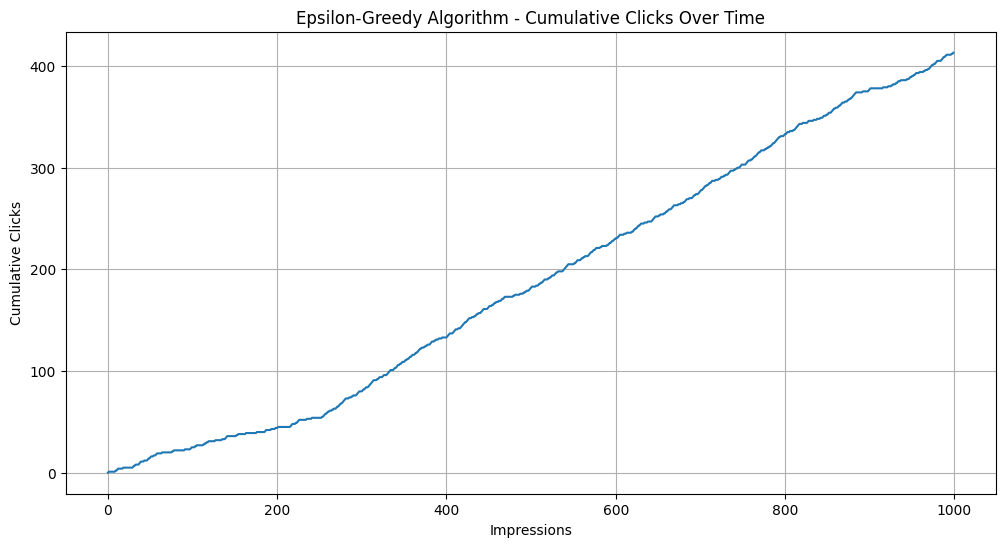

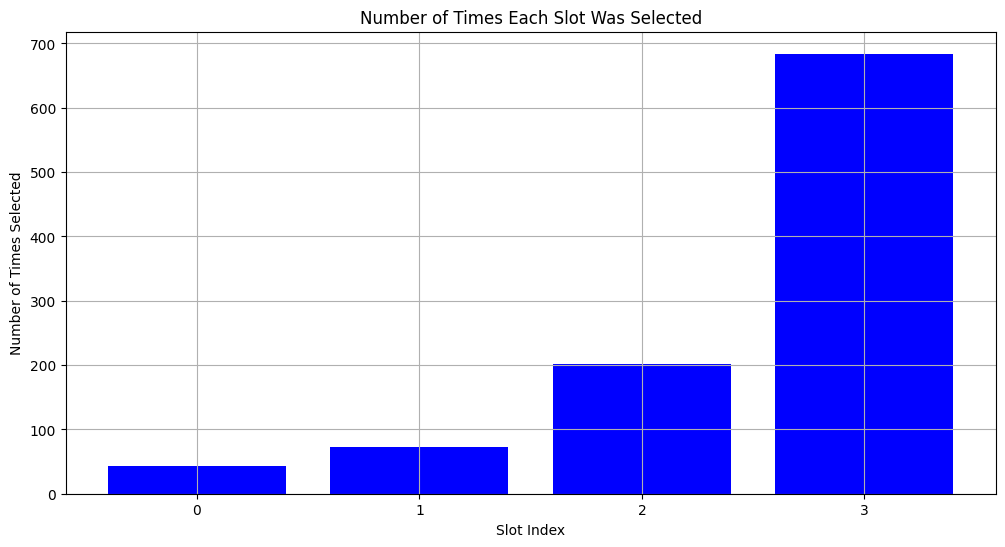

In [43]:
# Ad slot probabilities (unknown to the algorithm)
slot_probs = [0.1, 0.3, 0.2, 0.5]  # Assumed true probabilities for each slot
env = AdEnvironment(slot_probs)

# Simulation parameters
n_slots = len(slot_probs)
n_impressions = 1000
epsilon = 0.1  # Exploration probability

# Run the epsilon-greedy algorithm
rewards, slot_selections = epsilon_greedy(env, n_slots, n_impressions, epsilon)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(rewards)
plt.xlabel('Impressions')
plt.ylabel('Cumulative Clicks')
plt.title('Epsilon-Greedy Algorithm - Cumulative Clicks Over Time')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(range(n_slots), slot_selections, color='blue')
plt.xlabel('Slot Index')
plt.ylabel('Number of Times Selected')
plt.title('Number of Times Each Slot Was Selected')
plt.xticks(range(n_slots))
plt.grid(True)
plt.show()

## **Observations and Inference (Specific to Epsilon-Greedy Algorithm for Ad Slot Selection):**

#### Context:
In this scenario, the graph represents the performance of the epsilon-greedy algorithm for selecting among four ad slots, based on their unknown click-through rates (CTR). The algorithm explores with probability epsilon and exploits the best-known ad slot with probability 1-epsilon over 1000 ad impressions.

### Observations (Based on the Graph):
1. **Slot 3 Dominance**: The graph shows that Slot 3 was selected over 675 times, which implies it was identified by the epsilon-greedy algorithm as having the highest CTR or reward over time. The algorithm likely shifted from exploration to exploitation as it recognized Slot 3 as the best-performing option.
   
2. **Slot 2 Selected Moderately**: Slot 2 was chosen around 350 times, suggesting that it performed well but was not as consistently successful as Slot 3. The algorithm explored it initially but likely shifted away from Slot 2 when it found Slot 3 to be superior.

3. **Limited Selection of Slots 0 and 1**: Slots 0 and 1 were selected far fewer times (fewer than 100 and around 125 times, respectively). These slots were likely explored early on but deemed less effective, leading to fewer selections as the algorithm focused on exploitation of the better slots (Slots 2 and 3).

4. **Skewed Distribution**: The skewed distribution indicates that the epsilon-greedy algorithm quickly identified the best-performing slot (Slot 3) and primarily exploited that choice, while still allowing for some exploration of other slots.

### Inference:
- **Algorithm Behavior**: The epsilon-greedy algorithm is working as expected, gradually shifting from exploration (trying different slots) to exploitation (selecting the best-performing slot). Over 1000 impressions, it has learned that Slot 3 offers the highest reward (CTR) and has focused on that slot.
  
- **Performance Efficiency**: The algorithm appears to have effectively balanced exploration and exploitation, identifying Slot 3 as the optimal choice for the majority of impressions. Slots 0 and 1 were explored but quickly discarded due to their lower performance.

- **Epsilon Parameter**: Depending on the epsilon value used (which controls the exploration-exploitation balance), the graph indicates that there was still some exploration throughout the 1000 impressions, as evidenced by the non-zero selections of other slots.

### Conclusion:
The epsilon-greedy algorithm adapted well to the environment, favoring Slot 3 as the best ad slot based on its higher click-through rate. It continued to explore other slots but focused primarily on exploiting the best-performing slot, optimizing for cumulative reward over time.

### **USING UPPER CONFIDENCE BOUND ALGORITHM**

In [29]:
class MultiArmedBanditUCB:
  def __init__(self, n_slots):
    #Initialise the number of slots
    self.n_slots = n_slots
    #True probabilities of success for each slot(unknown to the agent)
    self.probabilities = np.random.rand(n_slots)

    #Estimated probabilities of success for each slot (what the agent learns over time)
    self.estimates = np.zeros(n_slots)

    #No of times the ad in each slot has been shown
    self.counts = np.zeros(n_slots)

    #Total no of times the ads in the slots have been shown
    self.total_counts = 0


  def click_ad_slot(self, slot):
    '''Simulates clicking the ad in the slot. Returns 1 for success, 0 for failure'''
    return 1 if np.random.rand() < self.probabilities[slot] else 0

  def update_estimates(self, slot, reward):
    '''Updates the estimated probability of success for the slot based on the reward'''

    #Increment the number of counts for the slot
    self.counts[slot] += 1
    self.total_counts += 1

    #Update the estimated probability using the average of observed rewards
    self.estimates[slot] += (reward - self.estimates[slot]) / self.counts[slot]


  def select_ucb_slot(self):
    '''Selects a slot using the Upper Confidence Bound (UCB) Strategy'''

    if self.total_counts < self.n_slots:
      #Ensuring ad is shown in each slot atleast once
      return self.total_counts
    else:
      #Calculate UCB for each slot
      ucb_values = np.zeros(self.n_slots)

      for slot in range(self.n_slots):
        if self.counts[slot] > 0:
          confidence_interval = np.sqrt(2 * np.log(self.total_counts) / self.counts[slot])
          ucb_values[slot] = self.estimates[slot]+confidence_interval

      return np.argmax(ucb_values)


* def select_ucb_slot(self) : function that selects an arm (a choice or option) using the Upper Confidence Bound (UCB) strategy. The UCB strategy is a way of balancing the exploration of different options with the exploitation of the best option found so far.

  * The function first checks if each arm has been pulled at least once. If not, it returns the index of the next arm to be pulled.

  * If all arms have been pulled at least once, the function calculates the UCB value for each arm. The UCB value is based on the estimated reward value for the arm, combined with a confidence interval that represents uncertainty about the estimate.

  * The function then returns the index of the arm with the highest UCB value, indicating the arm that is currently most promising according to the UCB strategy.  

* **The equation for calculating the confidence interval in the context of the Upper Confidence Bound (UCB) algorithm is derived from Hoeffding's inequality and the principle of concentration of measure. The confidence interval provides a measure of the uncertainty or variability associated with the estimated reward for a particular arm in a multi-armed bandit problem.**

In [30]:
def ucb_strategy(ad, n_rounds) :
  '''Runs the UCB strategy and returns the cumulative rewards and ad shown in the slots count'''

  total_reward = 0
  rewards = []
  ad_shown = np.zeros(ad.n_slots)

  for _ in range(n_rounds):

    #Select a slot using UCB
    slot = ad.select_ucb_slot()

    #Show the ad in the selected slot
    reward = ad.click_ad_slot(slot)

    #Update the estimate for the selected slot
    ad.update_estimates(slot,reward)

    #Update total reward and ad shown in the slot count
    total_reward += reward
    rewards.append(total_reward)
    ad_shown[slot] += 1

  return rewards, ad_shown

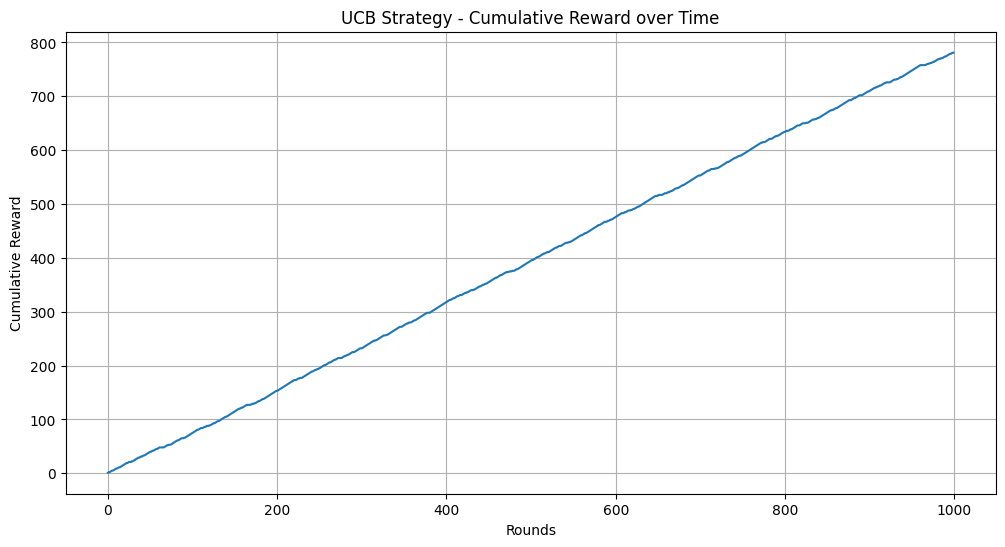

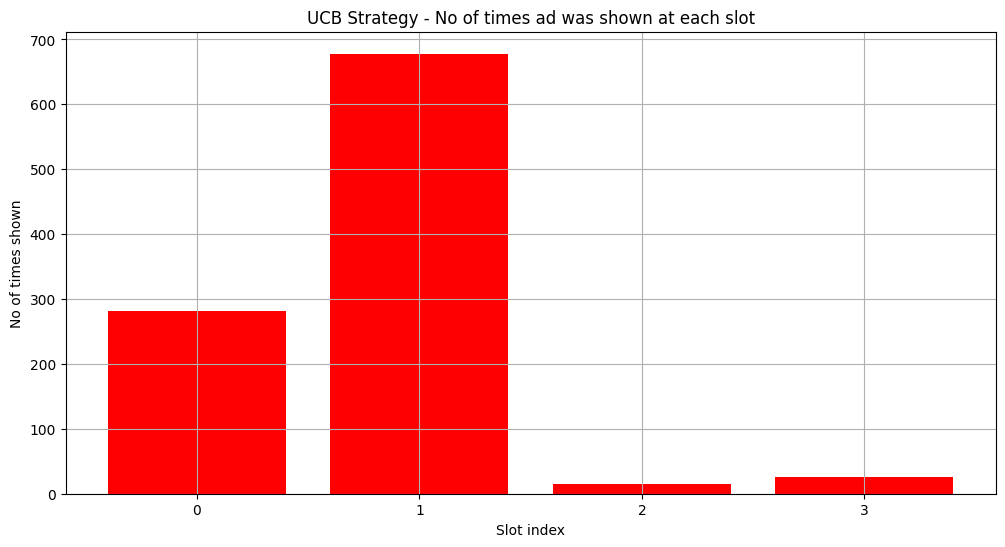

In [40]:
#Parameters

n_slots = 4            # No of slots
n_rounds = 1000         # No of iterations

#Create the multi-armed bandit
ad = MultiArmedBanditUCB(n_slots)

#Apply the UCB strategy
rewards, ad_shown = ucb_strategy(ad, n_rounds)

#Visualisation : Cumulative Reward over Time
plt.figure(figsize=(12,6))
plt.plot(rewards)
plt.xlabel('Rounds')
plt.ylabel('Cumulative Reward')
plt.title('UCB Strategy - Cumulative Reward over Time')
plt.grid(True)
plt.show()

#Visualisation  : No of times ad was shown at each slot
plt.figure(figsize=(12,6))
plt.bar(range(n_slots), ad_shown, color='red')
plt.xlabel('Slot index')
plt.ylabel('No of times shown')
plt.title('UCB Strategy - No of times ad was shown at each slot')
plt.xticks(range(n_slots))
plt.grid(True)
plt.show()

## **Observations and Inference (UCB Strategy - Cumulative Reward over Time)**

#### Observations (Based on the Graph):
1. **Consistent Linear Growth**: The cumulative reward steadily increases over time, exhibiting a nearly linear upward trend from 0 to 1000 rounds (impressions). This shows that the UCB algorithm consistently gains rewards across the entire simulation.

2. **Smooth Performance**: The line graph is very smooth, indicating that the algorithm is not fluctuating much in terms of performance. There are no sharp dips or flat regions, meaning the UCB strategy is consistently optimizing its choices and accumulating rewards.

3. **No Significant Delays or Dips**: There are no noticeable pauses in reward collection, suggesting that the algorithm quickly identifies the best ad slot and exploits it efficiently. The lack of fluctuations implies a high level of confidence in the chosen slot.

#### Inference:
- **UCB Algorithm's Efficiency**: The consistent increase in cumulative rewards indicates that the UCB algorithm is functioning efficiently, exploring early on but quickly focusing on exploitation of the best-performing slot. The linear increase suggests that the algorithm finds the optimal strategy and maximizes rewards without major delays.
  
- **Balanced Exploration and Exploitation**: The lack of dips or flat regions suggests that the exploration phase of UCB was handled effectively, and once the algorithm shifted to exploitation, it was able to steadily collect rewards. The cumulative reward function growing at a constant rate also suggests minimal wasted impressions on suboptimal slots.

- **Optimal Performance**: The smooth, linear growth pattern suggests that the UCB algorithm achieved near-optimal performance over 1000 impressions, accumulating rewards at a constant rate. This implies that the algorithm found and exploited the best ad slot early on and maintained this strategy throughout the process.

### Conclusion:
The UCB algorithm successfully learned to maximize the cumulative reward, as evidenced by the steady, linear increase over 1000 rounds. It efficiently balanced exploration and exploitation to optimize ad slot selection, leading to smooth and consistent reward accumulation. This is a strong indicator that the UCB algorithm performs well in environments where exploration is important early on but exploitation is critical for long-term success.

## **Observations and Inference of the BAR GRAPH (Specific to UCB Algorithm for Ad Slot Selection):**

#### Observations (Based on the Graph):
1. **Slot 1 Dominance**: The graph shows that Slot 1 was selected nearly 700 times, indicating that the UCB (Upper Confidence Bound) algorithm identified it as the best-performing ad slot over time.
   
2. **Moderate Selection of Slot 0**: Slot 0 was selected around 300 times, which suggests that the algorithm considered it as a potentially good option, but eventually settled on Slot 1 as superior.

3. **Limited Selection of Slots 2 and 3**: Slots 2 and 3 were selected very few times, with fewer than 50 selections each. The UCB algorithm quickly ruled them out as underperforming, focusing its attention on Slot 1.

4. **Clear Skew Towards Slot 1**: The selection frequency is highly skewed toward Slot 1, with minimal exploration or focus on Slots 2 and 3.

#### Inference:
- **UCB Algorithm Behavior**: The UCB algorithm operates by balancing exploration and exploitation, where the selection strategy includes a confidence bound that accounts for both past rewards and the uncertainty of each slot's performance. In this case, Slot 1 emerged as the top-performing slot, and the algorithm increasingly exploited this option as more impressions were served.

- **Slot Exploration**: While Slot 0 was moderately explored, Slots 2 and 3 were almost entirely ignored, indicating that the UCB algorithm quickly deemed them as low-performing. Unlike epsilon-greedy, which continues exploring at a steady rate, UCB aggressively narrows down to the best-performing slots as soon as enough data is gathered.

- **Efficient Exploitation**: The UCB algorithm's performance is efficient in focusing on the optimal slot (Slot 1) while still exploring other options, though to a much lesser degree. It is more confident in its choices than epsilon-greedy, hence the more pronounced skew toward a single slot.

#### Comparison to Epsilon-Greedy:
- In the epsilon-greedy algorithm (from the previous graph), there was more exploration of other slots, especially Slot 3, whereas UCB has more aggressively narrowed down to Slot 1.
- The UCB algorithm's selection process is more focused on balancing the reward and uncertainty, which leads to faster identification of the best-performing slot, minimizing the chances of suboptimal choices.

#### Conclusion:
The UCB algorithm effectively identified Slot 1 as the best-performing ad slot and concentrated the majority of impressions on it. The selection of Slot 0 shows that some exploration continued, but Slots 2 and 3 were largely ignored due to their poor performance. The UCB algorithm displayed a strong tendency toward exploitation once it was confident in the rewards from Slot 1.

### **Difference Between Epsilon-Greedy and UCB Algorithms in the Context of Ad Slot Selection**

In the provided case, both the epsilon-greedy and UCB algorithms aim to maximize cumulative rewards by selecting ad slots over 1000 impressions. Let's break down the key differences observed in their performance and behavior:

### 1. **Exploration vs. Exploitation Strategy**
   - **Epsilon-Greedy**:
     - **Exploration**: The epsilon-greedy algorithm selects a random ad slot with a probability of epsilon. This ensures exploration of all ad slots, even if some perform poorly.
     - **Exploitation**: With a probability of 1-epsilon, the algorithm selects the ad slot that has historically given the best rewards.
     - **Observation**: In the graph for epsilon-greedy, we saw a moderate amount of exploration across multiple slots, with Slot 3 dominating in the end, but the algorithm still selected other slots occasionally due to the exploration phase.
   
   - **UCB (Upper Confidence Bound)**:
     - **Exploration**: UCB incorporates a confidence term to explore uncertain ad slots. Early on, the algorithm explores more slots but gradually reduces exploration as it becomes more confident in the best-performing slot.
     - **Exploitation**: UCB aggressively shifts to exploitation once it has identified the optimal slot. It balances exploration and exploitation using a theoretical upper confidence bound on the expected reward.
     - **Observation**: In the UCB strategy, Slot 1 was selected overwhelmingly as the best-performing slot, with minimal exploration of other slots (particularly Slot 2 and Slot 3). This indicates that UCB exploited its top choice much more confidently than epsilon-greedy.

### 2. **Rate of Convergence to the Optimal Slot**
   - **Epsilon-Greedy**:
     - The algorithm takes longer to converge to the best slot because it continues to explore suboptimal slots with a fixed probability of epsilon. Even as it exploits the best slot (Slot 3), it still revisits other slots occasionally.
     - **Consequence**: While epsilon-greedy does exploit the best slot for a large portion of the impressions, it shows a slower rate of full convergence compared to UCB. This is visible in how Slots 1 and 2 still receive non-negligible selections.
   
   - **UCB**:
     - UCB converges much faster to the optimal slot, aggressively exploiting it once it has gathered enough information. It doesn't revisit suboptimal slots as often as epsilon-greedy because of its confidence-based selection strategy.
     - **Consequence**: UCB quickly identifies Slot 1 as the best performer and focuses almost exclusively on it, leading to a faster and more consistent accumulation of rewards.

### 3. **Cumulative Reward Growth**
   - **Epsilon-Greedy**:
     - The cumulative reward growth would likely be steady but slower compared to UCB because epsilon-greedy periodically explores suboptimal slots. This means some impressions are spent on non-optimal choices, which reduces the overall reward rate.
     - **Observation**: In the epsilon-greedy algorithm, the cumulative reward would show a steady increase but with occasional dips or flatter regions due to exploration. This is in contrast to the linear reward growth seen in UCB.
   
   - **UCB**:
     - UCB shows a faster accumulation of cumulative rewards because it reduces unnecessary exploration more effectively. Once it identifies Slot 1 as optimal, the reward grows almost linearly without much fluctuation.
     - **Observation**: In the UCB cumulative reward graph, the line was almost perfectly linear, indicating a consistent and optimal reward collection with very little wasted exploration.

### 4. **Slot Selection Distribution**
   - **Epsilon-Greedy**:
     - The selection of slots is more spread out. While the algorithm identifies Slot 3 as the best option, other slots (especially Slot 2) were still selected relatively often due to the exploration factor (epsilon). This indicates a higher rate of non-optimal selections.
     - **Observation**: Slot 3 was chosen most frequently, but Slot 2 and Slot 1 were also explored consistently.
   
   - **UCB**:
     - The selection of slots is heavily skewed towards one optimal slot (Slot 1). UCB quickly discards suboptimal slots and focuses almost entirely on the slot with the highest expected reward.
     - **Observation**: Slot 1 dominated with nearly 700 selections, while Slots 2 and 3 were rarely chosen, reflecting UCB's more decisive behavior in exploitation.

### 5. **Algorithm Robustness**
   - **Epsilon-Greedy**:
     - Epsilon-greedy can be more robust in non-stationary environments where the optimal slot might change over time. The constant exploration (due to epsilon) allows it to adapt to changing conditions. However, this comes at the cost of more suboptimal selections.
   
   - **UCB**:
     - UCB is well-suited for environments where the reward distribution does not change over time. Its aggressive shift to exploitation makes it very efficient in finding the optimal slot in stationary settings. However, it may not adapt as well to environments where the slot rewards change, as it reduces exploration over time.

### Summary of Key Differences:

| **Aspect**                      | **Epsilon-Greedy**                                             | **UCB (Upper Confidence Bound)**                               |
|----------------------------------|----------------------------------------------------------------|----------------------------------------------------------------|
| **Exploration**                  | Fixed exploration rate, constant exploration of suboptimal slots. | Adaptive exploration, reduces over time as confidence increases. |
| **Exploitation**                 | Exploits the best-known slot but still explores randomly.        | Focuses on exploiting the best slot once identified.            |
| **Rate of Convergence**          | Slower, continues to explore suboptimal slots.                   | Faster, quickly converges to the optimal slot.                  |
| **Cumulative Reward Growth**     | Steady but slower due to exploration of suboptimal slots.        | Near-linear growth due to fast identification of the optimal slot. |
| **Slot Selection Distribution**  | More spread out, even suboptimal slots get some selections.       | Highly concentrated on the optimal slot with minimal exploration. |
| **Robustness in Non-Stationary Environments** | More adaptable due to constant exploration.                     | Less adaptable, focuses on exploitation after early exploration. |

### Conclusion:
- **Epsilon-Greedy** is a good balance between exploration and exploitation but spends more time exploring, leading to a slower convergence to the optimal slot.
- **UCB** converges much faster to the optimal slot, focusing on maximizing rewards efficiently with minimal exploration once the best slot is found.